In [92]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import folium
from folium import plugins
import seaborn as sns

In [93]:
restaurant_csv_path = "data/DOHMH_New_York_City_Restaurant_Inspection_Results.csv"
df = pd.read_csv(restaurant_csv_path)
# Get a sense of what each column is:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332260 entries, 0 to 332259
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   CAMIS                  332260 non-null  int64  
 1   DBA                    330973 non-null  object 
 2   BORO                   332260 non-null  object 
 3   BUILDING               331671 non-null  object 
 4   STREET                 332248 non-null  object 
 5   ZIPCODE                327268 non-null  float64
 6   PHONE                  332233 non-null  object 
 7   CUISINE DESCRIPTION    328321 non-null  object 
 8   INSPECTION DATE        332260 non-null  object 
 9   ACTION                 328322 non-null  object 
 10  VIOLATION CODE         324577 non-null  object 
 11  VIOLATION DESCRIPTION  326583 non-null  object 
 12  CRITICAL FLAG          332260 non-null  object 
 13  SCORE                  316878 non-null  float64
 14  GRADE                  168065 non-nu

In [94]:
# Quick check of missing values:
df.isna().sum()

CAMIS                         0
DBA                        1287
BORO                          0
BUILDING                    589
STREET                       12
ZIPCODE                    4992
PHONE                        27
CUISINE DESCRIPTION        3939
INSPECTION DATE               0
ACTION                     3938
VIOLATION CODE             7683
VIOLATION DESCRIPTION      5677
CRITICAL FLAG                 0
SCORE                     15382
GRADE                    164195
GRADE DATE               168554
RECORD DATE                   0
INSPECTION TYPE            3938
Latitude                    316
Longitude                   316
Community Board            5790
Council District           5782
Census Tract               5782
BIN                        7289
BBL                         810
NTA                        5790
dtype: int64

We need to drop any rows that have a missing grade, because this is the target we want to predict, so it makes sense to drop these rows

In [95]:
# df.dropna(subset=['GRADE'])
df = df.dropna()

Now, lets explore the distributions of the observed data points. Makes the most sense to first start with the target value's distribution

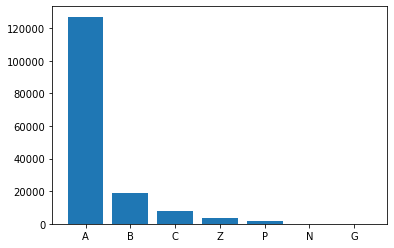

In [96]:
grades = pd.DataFrame(df["GRADE"].value_counts())
grades
plt.bar(grades.index, height=grades["GRADE"])
plt.show()

Note that: 	
Grade associated with the inspection; 

• N = Not Yet Graded

• A = Grade A

• B = Grade B

• C = Grade C

• Z = Grade Pending

• P= Grade Pending issued on re-opening following an initial inspection that resulted in a closure

Clearly, there is an ordinal ranking system to these, so it makes sense to encode them ordinally. 

In [97]:
cuisines = pd.DataFrame(df["CUISINE DESCRIPTION"].value_counts())
cuisines.index.unique()

# plt.bar(cuisines.index, height=cuisines["CUISINE DESCRIPTION"])
# plt.show()

Index(['American', 'Chinese', 'Pizza', 'Coffee/Tea', 'Italian',
       'Latin American', 'Japanese', 'Mexican', 'Caribbean',
       'Bakery Products/Desserts', 'Spanish', 'Chicken', 'Sandwiches',
       'Donuts', 'Hamburgers', 'Indian', 'Asian/Asian Fusion', 'Jewish/Kosher',
       'Thai', 'Tex-Mex', 'Juice, Smoothies, Fruit Salads', 'Korean',
       'Mediterranean', 'French', 'Frozen Desserts', 'Seafood', 'Irish',
       'Bagels/Pretzels', 'Middle Eastern', 'Greek', 'Other', 'Peruvian',
       'Sandwiches/Salads/Mixed Buffet', 'African', 'Southeast Asian',
       'Steakhouse', 'Bottled Beverages', 'Salads', 'Vegetarian',
       'Soups/Salads/Sandwiches', 'Eastern European', 'Barbecue', 'Turkish',
       'Russian', 'Bangladeshi', 'Soul Food', 'Chinese/Japanese', 'Tapas',
       'Hawaiian', 'Filipino', 'Continental', 'Vegan', 'German', 'Pakistani',
       'Brazilian', 'Creole', 'Polish', 'Australian', 'Pancakes/Waffles',
       'Hotdogs/Pretzels', 'English', 'Hotdogs', 'Chinese/Cuban', 

In [98]:
A_grade_inspections = df[df["GRADE"] == "A"].sample(300)

inspection_station_locations = A_grade_inspections[["Latitude", "Longitude"]].sample(1)
map = folium.Map(location=[inspection_station_locations.Latitude.mean(), 
                           inspection_station_locations.Longitude.mean()], 
                           zoom_start=14, 
                           control_scale=True)

plugins.HeatMap(list(zip(A_grade_inspections["Latitude"], A_grade_inspections["Longitude"])), radius=15, min_opacity=1).add_to(map)
map

